In [1]:
# a 2d array of random numbers
using CSV, DataFrames
numbers = rand(5, 5)
 
# using write method
CSV.write("D:\\Julia\\data\\geek.csv", DataFrame(numbers, :auto),
                         header = false, append = true)

"D:\\Julia\\data\\geek.csv"

In [2]:
using JuMP
import Ipopt
import Plots

dubinsCar = Model(Ipopt.Optimizer)
set_silent(dubinsCar)

true

In [3]:
x_0 = 0
y_0 = 0
v_all = 1
a_0 = 0 # a is angle


# target location, can change this
x_f = 1
#println(typeof(x_f))
y_f = 2
time = sqrt((x_f-x_0)^2 + (y_f-y_0)^2)/v_all
n = Int64(floor(max(100,10*time)))

100

In [4]:
@variables(dubinsCar, begin
    Δt ≥ 0.5*pi/n, (start = 1/100) # Time step
    #n ≥ 1
    # State variables
    v_all ≤ v[1:n] ≤ v_all        # speed
    x[1:n] #≥ h_0         # x
    y[1:n]
    a[1:n]
    # Control variables
    #-1 ≤ u[1:n] ≤ 1    # Thrust
    
end)

In [37]:
unregister(dubinsCar, :Δt)
unregister(dubinsCar, :n)
unregister(dubinsCar, :v)
unregister(dubinsCar, :x)
unregister(dubinsCar, :y)
unregister(dubinsCar, :u)
unregister(dubinsCar, :a)

In [39]:
@objective(dubinsCar, Min, Δt)

Δt

In [40]:
fix(x[1], x_0; force = true)
fix(y[1], y_0; force = true)
fix(a[1], a_0; force = true)
fix(x[n], x_f; force = true)
fix(y[n], y_f; force = true)

In [41]:
for j in 2:n
    # a' = vu
    # Rect
    @NLconstraint(dubinsCar, a[j] == a[j - 1] + Δt * v[j - 1]*(u[j-1]))
    # x' = vcos(a)
    # Rectangular integration
    @NLconstraint(dubinsCar, x[j] == x[j - 1] + Δt * v[j - 1]*cos(a[j-1]))
    # m' = -T/c
    # Rectangular integration
    # @NLconstraint(rocket, m[j] == m[j - 1] - Δt * T[j - 1] / c)
    # Trapezoidal integration
    @NLconstraint(dubinsCar, y[j] == y[j - 1] + Δt * v[j - 1]*sin(a[j-1]))
end

In [ ]:
println("Solving...")
optimize!(dubinsCar)
solution_summary(dubinsCar)

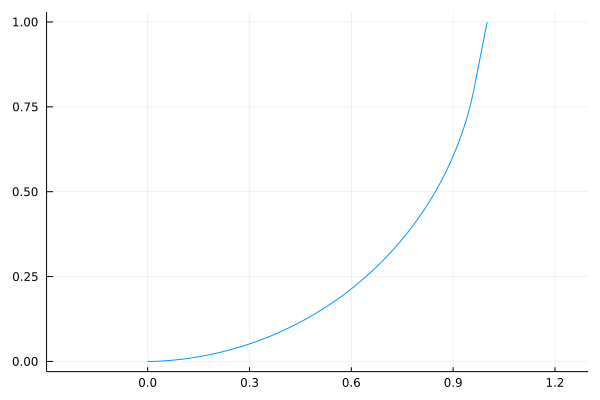

In [35]:
Plots.plot(value.(x),value.(y),fmt=:png, legend = false, aspect_ratio = 1)


In [ ]:
z = hcat(value.(x),value.(y))

In [ ]:
termination_status(dubinsCar) == temp

In [ ]:
temp = termination_status(dubinsCar)

In [ ]:
i=2
while i<3
    println(i)
    i+=1
end

In [ ]:
using JuMP
import Ipopt
import Plots

dubinsCar = Model(Ipopt.Optimizer)
set_silent(dubinsCar)

while true
    x_0 = 0
    y_0 = 0
    v_all = 1
    a_0 = 0 # a is angle
    x_f = (rand(1)[1]-0.5)*6
    
    y_f = (rand(1)[1]-0.5)*6
    time = sqrt((x_f-x_0)^2 + (y_f-y_0)^2)/v_all
    n = Int64(max(100,10*time))
    
    # unregister vars
    
    unregister(dubinsCar, :Δt)
    unregister(dubinsCar, :n)
    unregister(dubinsCar, :v)
    unregister(dubinsCar, :x)
    unregister(dubinsCar, :y)
    unregister(dubinsCar, :u)
    unregister(dubinsCar, :a)
    @variables(dubinsCar, begin
        Δt ≥ 1*pi/n, (start = 1/100) # Time step
        #n ≥ 1
        # State variables
        v_all ≤ v[1:n] ≤ v_all        # speed
        x[1:n] #≥ h_0         # x
        y[1:n]
        a[1:n]
        # Control variables
        -1 ≤ u[1:n] ≤ 1    # Thrust
    end)
    
    @objective(dubinsCar, Min, Δt)
    
    fix(x[1], x_0; force = true)
    fix(y[1], y_0; force = true)
    fix(a[1], a_0; force = true)
    fix(x[n], x_f; force = true)
    fix(y[n], y_f; force = true)
    for j in 2:n
        # a' = vu
        # Rect
        @NLconstraint(dubinsCar, a[j] == a[j - 1] + Δt * v[j - 1]*u[j-1])
        # x' = vcos(a)
        # Rectangular integration
        @NLconstraint(dubinsCar, x[j] == x[j - 1] + Δt * v[j - 1]*cos(a[j-1]))
        # Rectangular integration
        # @NLconstraint(rocket, m[j] == m[j - 1] - Δt * T[j - 1] / c)
        # Trapezoidal integration
        @NLconstraint(dubinsCar, y[j] == y[j - 1] + Δt * v[j - 1]*sin(a[j-1]))
    end
    
    # SOLVING
    
    
    optimize!(dubinsCar)
    #solution_summary(dubinsCar)
    
    if termination_status(dubinsCar) != temp
        println("Solving...")
        x_fin = ones(n)*x_f
        y_fin = ones(n)*y_f
        matrix = hcat(x_fin,y_fin,value.(x),value.(y),value.(a),value.(u))
        CSV.write("D:\\Julia\\data\\dubinsData.csv", DataFrame(matrix, :auto),
                         header = false, append = true)
    end
end

In [ ]:
ones(3)*3.4